# Data Collection

In [112]:
import pandas as pd

data = pd.read_csv('spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [89]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


# Data Cleaning and Preprocessing

In [90]:
X = data['v2']
y = data['v1']

In [91]:
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemming = PorterStemmer()

corpus = []
for i in range(len(X)):
    content = re.sub('[^a-zA-Z]',' ',X[i])
    content = content.lower()
    content = content.split()

    content = [stemming.stem(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    corpus.append(content)
corpus[:3]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli']

In [101]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bag = CountVectorizer(max_features=2500)
X = bag.fit_transform(corpus).toarray()

# TF-IDF
# from sklearn.feature_extraction.text import TfidfVectorizer
# bag = TfidfVectorizer(max_features=2500)
# X = bag.fit_transform(corpus).toarray()

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Models

In [107]:
# from sklearn.naive_bayes import MultinomialNB
# spam_detector_1 = MultinomialNB().fit(X_train,y_train)

# y_pred = spam_detector_1.predict(X_test)

# from sklearn.ensemble import RandomForestClassifier
# spam_detector_2 = RandomForestClassifier(n_estimators=200,max_depth= 50).fit(X_train,y_train)

# y_pred = spam_detector_2.predict(X_test)

# y_train = (y_train == 'spam')
# y_test = (y_test == 'spam')
# from xgboost import XGBClassifier
# spam_detector_3 = XGBClassifier(n_estimators=200,max_depth= 6,
#                                 learning_rate=0.1, random_state=42).fit(X_train,y_train)

# y_pred = spam_detector_3.predict(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': [0.1, 0.25, 0.35, 0.5, 1.0, 5.0, 10.0]}
spam_detector_4 = GridSearchCV(MultinomialNB(), params, cv=5)
spam_detector_4.fit(X_train, y_train)

print(spam_detector_4.best_params_)
y_pred = spam_detector_4.predict(X_test)
y_prob = spam_detector_4.predict_proba(X_test)[:, 1]

{'alpha': 5.0}


# Model Performance

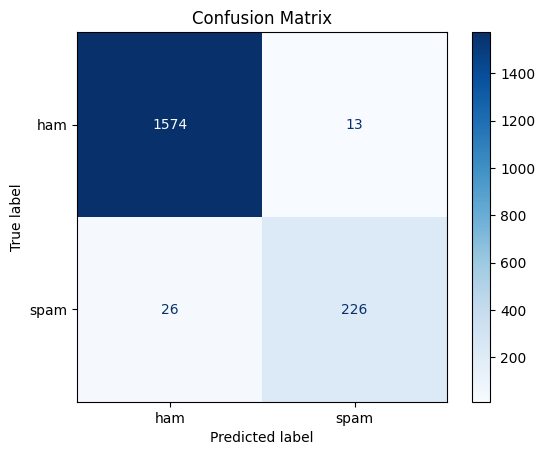

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm, display_labels=['ham','spam']).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1587
        spam       0.95      0.90      0.92       252

    accuracy                           0.98      1839
   macro avg       0.96      0.94      0.95      1839
weighted avg       0.98      0.98      0.98      1839



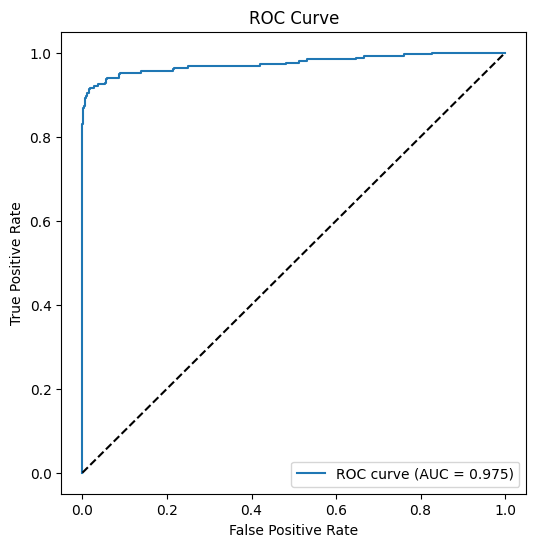

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='spam')
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], 'k--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

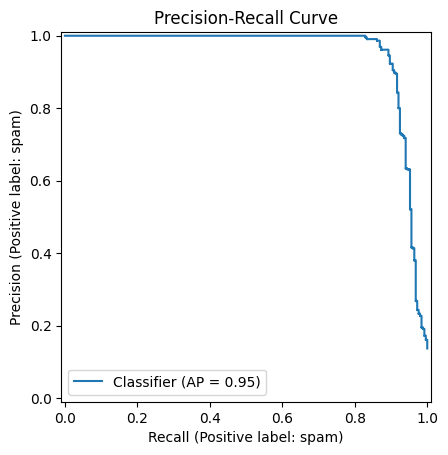

In [111]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_test, y_prob, pos_label='spam')
plt.title("Precision-Recall Curve")
plt.show()